## Something to do with pregnancy
a class that can be re-used for perceptron learning with minimal modifications 

In [69]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import math

In [70]:
class Perceptron():
    def __init__(self, eta, bias):
        self.weights = np.random.rand(2)
        self.eta = eta
        self.bias = bias

    @staticmethod
    def plotData(groups):
        for name, group in groups:
            plt.plot(group["Number of times pregnant"], group[" Age"], marker="x", linestyle="", label=name)
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.title('Plotting the data')
        plt.legend()

    # this is not used but i left it here because it's a cool one liner
    def unit_step(self, x):
        return 0 if x<0 else 1

    def sigmoid(self, s_dash):
        return 1/(1+math.e**(-s_dash))

    def getSdash(self, inputsT):
        return np.dot(inputsT , self.weights) - self.bias

    def getY(self, x):
        s_dash = self.getSdash(x)
        y = self.sigmoid(s_dash)
        return y

    def plotBoundary(self, groups):
        fig, ax = plt.subplots()

        for name, group in groups:
            ax.plot(group["Number of times pregnant"], group[" Age"], marker='o', linestyle='', label=name)

        x = np.linspace(0,10,10)
        y = -self.weights[0]/self.weights[1]*x + self.bias/self.weights[1]

        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.plot(x,y ,linewidth=5)

        ax.legend()

    def fit(self, x, d, groups, epochs=10):

        for j in range(epochs):
            for i in range(len(x)):
                y = self.getY(x[i])
                error = d[i] - y

                self.weights[0] = self.weights[0] + self.eta * x[i][0] * error * y * (y-1)
                self.weights[1] = self.weights[1] + self.eta * x[i][1] * error * y * (y-1)
                print(f"Epoch: {j+1}, Round: {i+1}, Weight 0: {self.weights[0]:.2f}, Weight 1: {self.weights[1]:.2f}")

            self.plotBoundary(groups)

    def predict(self, x):
        y = self.getY(x)
        return 1 if y>0.5 else 0

In [71]:
df = pd.read_csv("data1.csv")

x = df.iloc[:, :-1].values
d = df.iloc[:, -1].values
groups = df.groupby("Class")

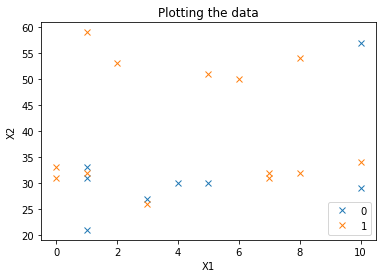

In [72]:
Perceptron.plotData(groups)

Epoch: 1, Round: 1, Weight 0: 0.69, Weight 1: 0.62
Epoch: 1, Round: 2, Weight 0: 0.69, Weight 1: 0.62
Epoch: 1, Round: 3, Weight 0: 0.69, Weight 1: 0.62
Epoch: 1, Round: 4, Weight 0: 0.69, Weight 1: 0.62
Epoch: 1, Round: 5, Weight 0: 0.69, Weight 1: 0.62
Epoch: 1, Round: 6, Weight 0: 0.69, Weight 1: 0.62
Epoch: 1, Round: 7, Weight 0: 0.69, Weight 1: 0.62
Epoch: 1, Round: 8, Weight 0: 0.69, Weight 1: 0.62
Epoch: 1, Round: 9, Weight 0: 0.69, Weight 1: 0.62
Epoch: 1, Round: 10, Weight 0: 0.69, Weight 1: 0.62
Epoch: 1, Round: 11, Weight 0: 0.69, Weight 1: 0.62
Epoch: 1, Round: 12, Weight 0: 0.69, Weight 1: 0.62
Epoch: 1, Round: 13, Weight 0: 0.69, Weight 1: 0.62
Epoch: 1, Round: 14, Weight 0: 0.69, Weight 1: 0.62
Epoch: 1, Round: 15, Weight 0: 0.69, Weight 1: 0.62
Epoch: 1, Round: 16, Weight 0: 0.69, Weight 1: 0.62
Epoch: 1, Round: 17, Weight 0: 0.69, Weight 1: 0.62
Epoch: 1, Round: 18, Weight 0: 0.69, Weight 1: 0.62
Epoch: 1, Round: 19, Weight 0: 0.69, Weight 1: 0.62
Epoch: 1, Round: 20, 

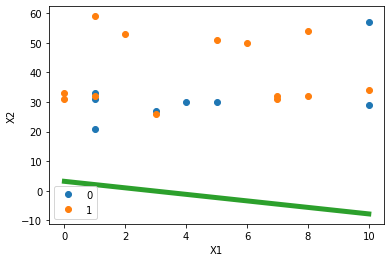

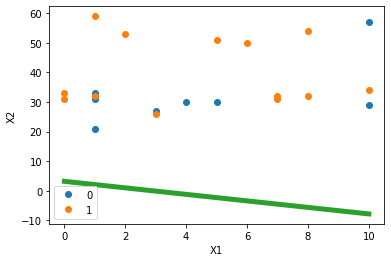

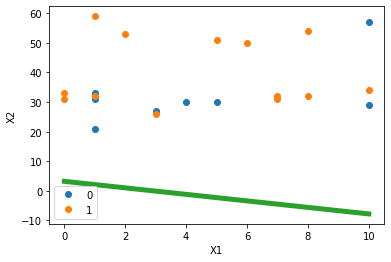

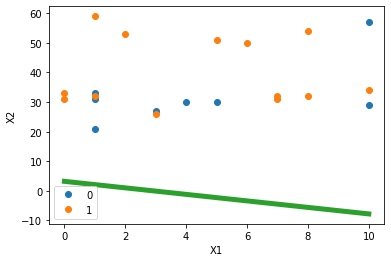

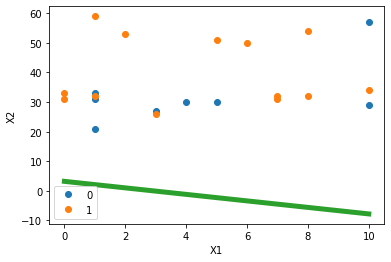

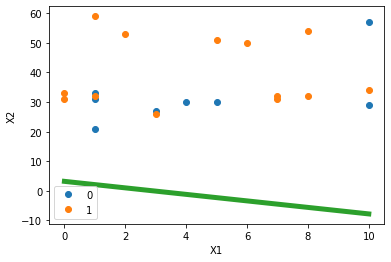

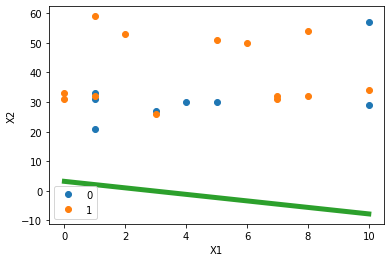

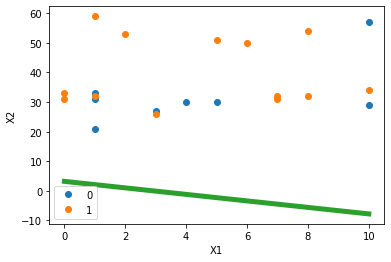

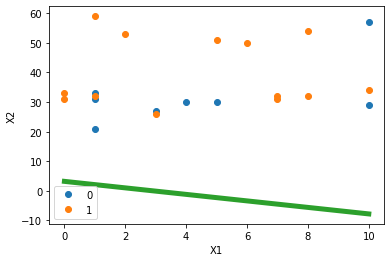

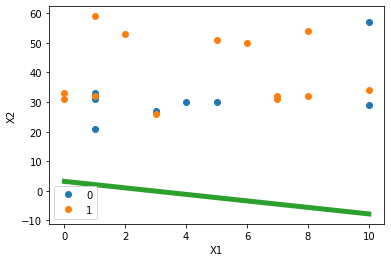

In [73]:
perceptron = Perceptron(eta=0.5, bias=2)
perceptron.fit(x, d, groups, epochs=10)